In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import linregress

In [48]:
#Import the consolidated data set
file_path = "data\\3_intermediate\\int_texas_border_report.csv"

border_report = pd.read_csv(
    file_path, 
    parse_dates=['nibrs_start_date', 'report_year'], 
    date_format='%Y-%m-%d')

border_report.head()

,agency_name,county,population,nibrs_start_date,murder_and_nonnegligent_manslaughter,negligent_manslaughter,rape,robbery,assault,burglary,...,arson,human_trafficking_commercial_sex_acts,human_trafficking_involuntary_servitude,months_reported,report_year,agency_type,university_pd,nibrs_eligible_months,has_preliminary_nibrs_reporting,nibrs_contribution_percentage
0,ALAMO PD,Hidalgo County,19351,2018-08-01,0,0,0,0,0,0,...,0,0,0,0,2017-12-31,Police Department,False,0,False,0.00
1,ALPINE PD,Brewster County,5983,2020-04-01,0,0,0,0,0,0,...,0,0,0,0,2017-12-31,Police Department,False,0,False,0.00
2,ALTON PD,Hidalgo County,17432,2019-09-01,0,0,0,0,0,0,...,0,0,0,0,2017-12-31,Police Department,False,0,False,0.00
3,ANTHONY PD,El Paso County,5681,2020-12-01,0,0,0,0,0,0,...,0,0,0,0,2017-12-31,Police Department,False,0,False,0.00
4,BREWSTER CO SO,Brewster County,3196,2015-01-01,1,0,2,0,19,4,...,1,0,0,11,2017-12-31,Sheriff's Office,False,12,False,91.67


In [49]:
#Create quarterly cohorts
border_report['report_year'] = border_report['report_year'].dt.year
border_report['nibrs_start_date'] = pd.to_datetime(border_report['nibrs_start_date'])
border_report.loc[:, 'cohort_year'] = border_report['nibrs_start_date'].dt.year
border_report.loc[:, 'cohort_quarter'] = border_report['nibrs_start_date'].dt.quarter
border_report.loc[:, 'cohort'] = border_report['cohort_year'].astype(str) + 'Q' + border_report['cohort_quarter'].astype(str)

# Display the head of the DataFrame to verify changes
border_report.sort_values('nibrs_contribution_percentage', ascending=False).head()

,agency_name,county,population,nibrs_start_date,murder_and_nonnegligent_manslaughter,negligent_manslaughter,rape,robbery,assault,burglary,...,months_reported,report_year,agency_type,university_pd,nibrs_eligible_months,has_preliminary_nibrs_reporting,nibrs_contribution_percentage,cohort_year,cohort_quarter,cohort
594,ZAPATA CO SO,Zapata County,14016,2020-01-01,0,0,0,0,53,19,...,12,2023,Sheriff's Office,False,12,False,100.0,2020,1,2020Q1
428,ANTHONY PD,El Paso County,3662,2020-12-01,0,0,2,3,37,0,...,12,2022,Police Department,False,12,False,100.0,2020,4,2020Q4
425,ALAMO PD,Hidalgo County,20383,2018-08-01,0,0,20,14,129,153,...,12,2022,Police Department,False,12,False,100.0,2018,3,2018Q3
221,PHARR PD,Hidalgo County,80896,2021-01-01,0,0,1,0,0,0,...,2,2019,Police Department,False,0,True,100.0,2021,1,2021Q1
220,PENITAS PD,Hidalgo County,4915,2019-01-01,0,0,1,0,45,28,...,12,2019,Police Department,False,12,False,100.0,2019,1,2019Q1


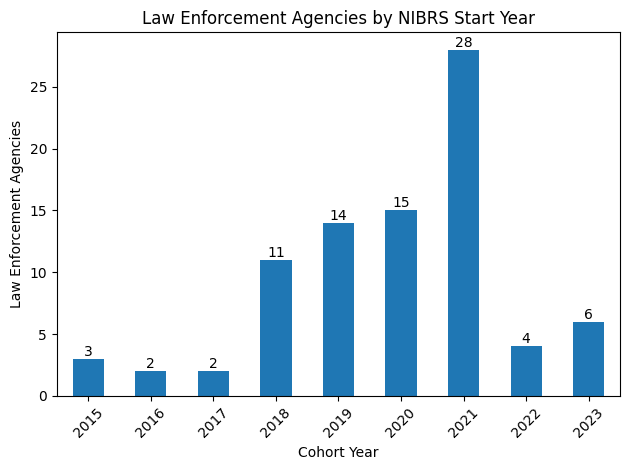

In [50]:
ax = border_report.groupby('cohort_year')['agency_name'].nunique().plot(kind='bar')

plt.xlabel('Cohort Year')
plt.ylabel('Law Enforcement Agencies')
plt.title('Law Enforcement Agencies by NIBRS Start Year')

# Angle the x-axis labels
plt.xticks(rotation=45)

# Add values to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()

#Save plot as a .png file
plt.savefig('graphs//count_of_law_enforcement_agencies_by_cohort_year.png')  

plt.show()

In [61]:
count_of_agencies_per_cohort = border_report.groupby('cohort_year')['agency_name'].nunique()

count_of_agencies_per_cohort = pd.DataFrame({'cohort_year': count_of_agencies_per_cohort.index, 
                   'count_of_agencies_per_cohort': count_of_agencies_per_cohort.values})

count_of_agencies_per_cohort['adoption_status'] = 'late'
count_of_agencies_per_cohort.loc[count_of_agencies_per_cohort['cohort_year'] < 2021, 'adoption_status'] = 'early'
count_of_agencies_per_cohort.loc[count_of_agencies_per_cohort['cohort_year'] == 2021, 'adoption_status'] = 'on time'

count_of_agencies_per_cohort


,cohort_year,count_of_agencies_per_cohort,adoption_status
0,2015,3,early
1,2016,2,early
2,2017,2,early
3,2018,11,early
4,2019,14,early
5,2020,15,early
6,2021,28,on time
7,2022,4,late
8,2023,6,late


In [69]:
# Calculate total count of agencies
total_agencies = count_of_agencies_per_cohort['count_of_agencies_per_cohort'].sum()

# Group by 'adoption' column and calculate percentages
adoption_percentages = count_of_agencies_per_cohort.groupby('adoption_status').sum()
adoption_percentages['percentage'] = round((adoption_percentages['count_of_agencies_per_cohort'] / total_agencies) * 100,2)

# Reset index to make 'adoption' a column instead of index
adoption_percentages = adoption_percentages.reset_index()

# Drop the 'cohort_year' column as it's no longer needed
adoption_percentages.drop(columns=['cohort_year'], inplace=True)

print(adoption_percentages.sort_values('count_of_agencies_per_cohort', ascending=False).to_markdown(index=False))


| adoption_status   |   count_of_agencies_per_cohort |   percentage |
|:------------------|-------------------------------:|-------------:|
| early             |                             47 |        55.29 |
| on time           |                             28 |        32.94 |
| late              |                             10 |        11.76 |


In [52]:
border_report.head()

,agency_name,county,population,nibrs_start_date,murder_and_nonnegligent_manslaughter,negligent_manslaughter,rape,robbery,assault,burglary,...,months_reported,report_year,agency_type,university_pd,nibrs_eligible_months,has_preliminary_nibrs_reporting,nibrs_contribution_percentage,cohort_year,cohort_quarter,cohort
0,ALAMO PD,Hidalgo County,19351,2018-08-01,0,0,0,0,0,0,...,0,2017,Police Department,False,0,False,0.00,2018,3,2018Q3
1,ALPINE PD,Brewster County,5983,2020-04-01,0,0,0,0,0,0,...,0,2017,Police Department,False,0,False,0.00,2020,2,2020Q2
2,ALTON PD,Hidalgo County,17432,2019-09-01,0,0,0,0,0,0,...,0,2017,Police Department,False,0,False,0.00,2019,3,2019Q3
3,ANTHONY PD,El Paso County,5681,2020-12-01,0,0,0,0,0,0,...,0,2017,Police Department,False,0,False,0.00,2020,4,2020Q4
4,BREWSTER CO SO,Brewster County,3196,2015-01-01,1,0,2,0,19,4,...,11,2017,Sheriff's Office,False,12,False,91.67,2015,1,2015Q1


In [53]:
# Group by 'report_year' and 'cohort', then calculate the mean 'nibrs_contribution_percentage'
avg_contribution_per_report_year_cohort = border_report.groupby(['report_year', 'cohort'])['nibrs_contribution_percentage'].mean().round(2).reset_index()

# Rename the aggregated column and round the values for clarity
avg_contribution_per_report_year_cohort['avg_nibrs_contribution_percentage'] = avg_contribution_per_report_year_cohort['nibrs_contribution_percentage']
avg_contribution_per_report_year_cohort = avg_contribution_per_report_year_cohort.drop(columns=['nibrs_contribution_percentage'])

# Display the new DataFrame
avg_contribution_per_report_year_cohort.head()

,report_year,cohort,avg_nibrs_contribution_percentage
0,2017,2015Q1,91.67
1,2017,2015Q3,79.16
2,2017,2016Q4,100.00
3,2017,2017Q2,100.00
4,2017,2017Q4,100.00


In [54]:
# Calculate the agencies per cohort
agencies_per_cohort = border_report.groupby(['cohort', 'cohort_year'])['agency_name'].count().reset_index()

# Calculate the total number of agencies
total_agencies = agencies_per_cohort['agency_name'].sum()

# Calculate the percentage for each cohort
agencies_per_cohort['percent'] = ((agencies_per_cohort['agency_name'] / total_agencies) * 100).round(2)

# Rename the 'agency_name' column to 'count_of_agencies' and 'percent' column to 'percent_of_agencies'
agencies_per_cohort = agencies_per_cohort.rename(columns={'agency_name': 'count_of_agencies', 'percent': 'percent_of_agencies'})

# Display the DataFrame with the new 'percent' column
agencies_per_cohort.head()

,cohort,cohort_year,count_of_agencies,percent_of_agencies
0,2015Q1,2015,7,1.18
1,2015Q3,2015,14,2.35
2,2016Q4,2016,14,2.35
3,2017Q2,2017,7,1.18
4,2017Q4,2017,7,1.18


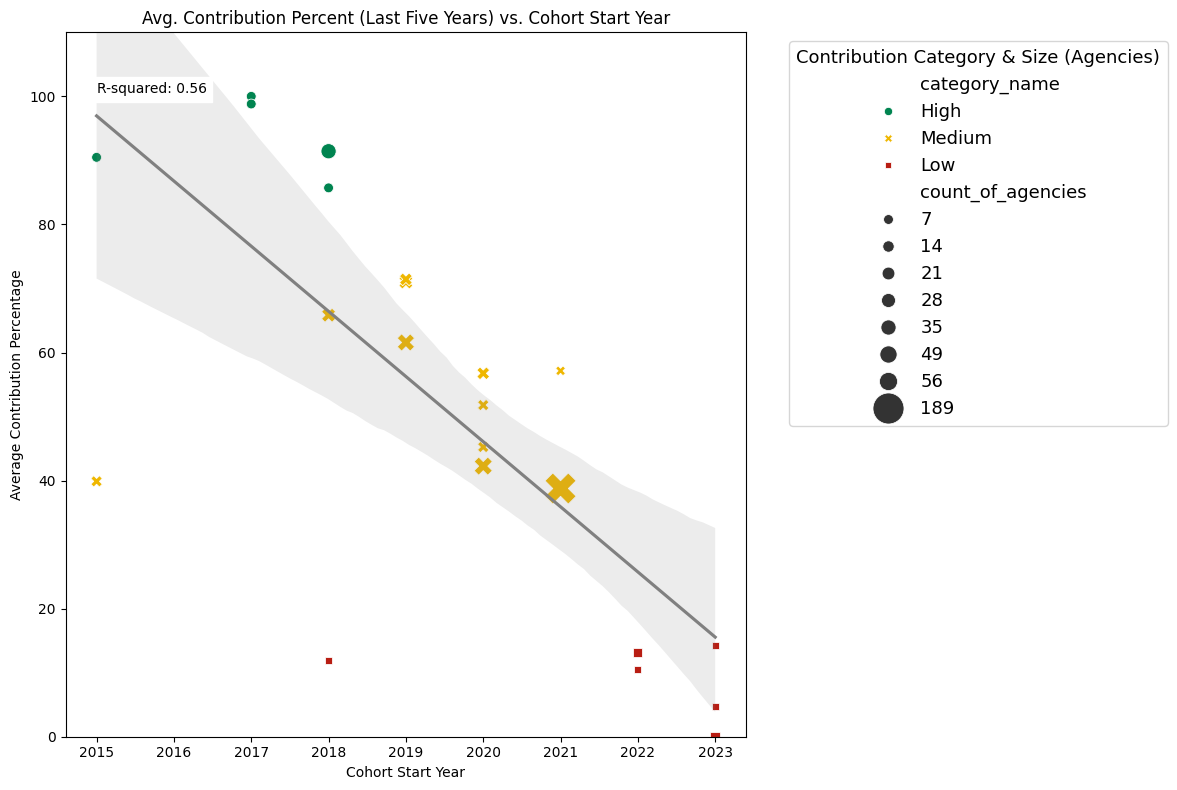

In [55]:
# Calculate the average contribution percentage for each cohort across all years
cohort_avg_contributions = avg_contribution_per_report_year_cohort.groupby('cohort')['avg_nibrs_contribution_percentage'].mean().round(2).reset_index()

# Define a function to categorize each cohort based on the defined thresholds
def categorize_contribution(avg_percentage):
    if avg_percentage > 75:
        return 'High'
    elif avg_percentage > 25:
        return 'Medium'
    else:
        return 'Low'

# Apply the categorization
cohort_avg_contributions['category_name'] = cohort_avg_contributions['avg_nibrs_contribution_percentage'].apply(categorize_contribution)

# Extract the start year from the cohort labels
cohort_avg_contributions['start_year'] = cohort_avg_contributions['cohort'].apply(lambda x: int(x[:4]))

# Merge the 'count_of_agencies' from 'agencies_per_cohort'
cohort_contributions_with_agencies = pd.merge(cohort_avg_contributions, agencies_per_cohort[['cohort', 'count_of_agencies']], on='cohort', how='left')

# Perform linear regression to find the R-squared value
regression_result = linregress(cohort_contributions_with_agencies['start_year'], cohort_contributions_with_agencies['avg_nibrs_contribution_percentage'])
r_squared = regression_result.rvalue ** 2

# Specify colors for each contribution category
palette = {'High': '#008450',  # Green
           'Medium': '#EFB700',  # Yellow
           'Low': '#B81D13'}  # Red

# Visualize the relationship between start year and average contribution percentage with adjusted point sizes and colors
plt.figure(figsize=(12, 8))
sns.scatterplot(
        data=cohort_contributions_with_agencies, 
        x='start_year', 
        y='avg_nibrs_contribution_percentage', 
        hue='category_name', 
        style='category_name', 
        size='count_of_agencies', 
        sizes=(50, 500), 
        palette=palette, 
        legend='full'
    )
sns.regplot(
        data=cohort_contributions_with_agencies, 
        x='start_year', 
        y='avg_nibrs_contribution_percentage', 
        scatter=False, 
        color='gray'
    )

plt.title('Avg. Contribution Percent (Last Five Years) vs. Cohort Start Year')
plt.xlabel('Cohort Start Year')
plt.ylabel('Average Contribution Percentage')
plt.legend(
        title='Contribution Category & Size (Agencies)',
        title_fontsize='13', 
        bbox_to_anchor=(1.05, 1), 
        loc='upper left', 
        prop={'size': 13}
    )

# Set the y-axis limit to cap at 100
plt.ylim(0, 110)

# Add the R-squared value to the plot
plt.text(
        x=min(cohort_contributions_with_agencies['start_year']), 
        y=max(cohort_contributions_with_agencies['avg_nibrs_contribution_percentage']), 
        s=f'R-squared: {r_squared:.2f}', 
        backgroundcolor='white', 
        ha='left', 
        va='bottom'
    )

plt.tight_layout()

#Save plot as a .png file
plt.savefig('graphs//avg_contribution_percent_l5_v_cohort_start_year.png')  
plt.show()

In [56]:
cohort_contributions_with_agencies.head() 

,cohort,avg_nibrs_contribution_percentage,category_name,start_year,count_of_agencies
0,2015Q1,90.48,High,2015,7
1,2015Q3,39.88,Medium,2015,14
2,2016Q4,100.00,High,2016,14
3,2017Q2,100.00,High,2017,7
4,2017Q4,98.81,High,2017,7


In [57]:
cohort_contributions_with_agencies.to_csv('data\\4_fact\\cohort_contributions_with_agencies.csv', index=False)